In [2]:
import torch
import pandas as pd
import glob

In [3]:
file_path = '/Users/topih/Pytorch/datasets/name_by_language/names'
allFiles = glob.glob(file_path + "/*.txt")

In [4]:
allFiles

['/Users/topih/Pytorch/datasets/name_by_language/names\\Arabic.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Chinese.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Czech.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Dutch.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\French.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\German.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Greek.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Irish.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Italian.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Japanese.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Korean.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Polish.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Scottish.txt',
 '/Users/topih/Pytorch/datasets/name_by_language/names\\Spanish.txt',
 '/Users/topih/Pytorch/datasets

In [5]:
name_data = pd.DataFrame()
list_ = []

In [6]:
for file_ in allFiles:
    df = pd.read_csv(file_,
                    sep='/n',
                    names = ['Name'],
                    engine = 'python',
                    error_bad_lines=False)
    df['language'] = str(file_.split('/')[-1].split('.')[0])
    
    list_.append(df)
    names_data = pd.concat(list_)

In [7]:
names_data.sample(10)

,Name,language
620,Okada,names\Japanese
53,Bosque,names\Spanish
140,Jasso,names\Spanish
74,Alberghi,names\Italian
221,Rocha,names\Spanish
68,Hanraets,names\Dutch
70,Touma,names\Arabic
250,Silva,names\Spanish
268,Molcan,names\Czech
121,Makricosta,names\Greek


In [8]:
languages = names_data['language'].unique()

In [9]:
languages

array(['names\\Arabic', 'names\\Chinese', 'names\\Czech', 'names\\Dutch',
       'names\\French', 'names\\German', 'names\\Greek', 'names\\Irish',
       'names\\Italian', 'names\\Japanese', 'names\\Korean',
       'names\\Polish', 'names\\Scottish', 'names\\Spanish',
       'names\\Vietnamese'], dtype=object)

In [11]:
len(languages)

15

In [12]:
len(names_data)

4994

In [14]:
names_data = names_data.drop_duplicates()

In [15]:
len(names_data)

4931

In [16]:
import string
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [17]:
def name_to_tensor(name):
    name_in_tensor = torch.zeros(len(name), 1, n_letters)
    for i, letter in enumerate(name):
        name_in_tensor[i][0][all_letters.find(letter)] = 1
        
    return name_in_tensor

In [19]:
name_to_tensor('a')

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])

In [20]:
name_to_tensor('a A')

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])

In [21]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    

In [22]:
n_hidden = 128
n_languages = len(languages)

In [29]:
rnn = RNN(n_letters, n_hidden, output_size = n_languages)

In [24]:
iterations = 100000
criterion = nn.NLLLoss()
learning_rate = 0.005

In [25]:
def output_to_language(output):
    top_n, top_index = output.topk(1)
    pred_i = top_index[0].item()
    pred = languages[pred_i]
    return pred

In [26]:
import random

In [27]:
current_loss = 0
all_losses = []

In [30]:
for iteration in range(1, iterations+1):
    
    i = random.randint(0, len(names_data)-1)
    
    name = names_data.iloc[i][0]
    name_in_tensor = name_to_tensor(name)
    
    language = names_data.iloc[i][1]
    language_in_tensor = torch.tensor([list(languages).index(language)], dtype=torch.long)
    
    hidden = rnn.initHidden()
    rnn.zero_grad()
    
    for i in range(name_in_tensor.size()[0]):
        output, hidden = rnn(name_in_tensor[i], hidden)
        
    loss = criterion(output, language_in_tensor)
    loss.backward()
    
    current_loss += loss.item()
    
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
        
    if iteration% 5000 == 0:
        pred = output_to_language(output)
        correct = '✓' if pred == language else '☓ (%s)' % language
        print('iters- %d %d%% (%s) Name- %s Language- %s %s' % \
             (iteration, iteration/iterations*100, loss.item(), name, pred, correct))
        
    if iteration % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

iters- 5000 5% (1.6518852710723877) Name- Ughi Language- names\Japanese ☓ (names\Italian)
iters- 10000 10% (2.2691240310668945) Name- Schneider Language- names\German ☓ (names\Dutch)
iters- 15000 15% (1.1619834899902344) Name- Behrend Language- names\German ✓
iters- 20000 20% (0.17943763732910156) Name- Asanuma Language- names\Japanese ✓
iters- 25000 25% (0.8357617855072021) Name- Sheinfeld Language- names\German ✓
iters- 30000 30% (0.8057687282562256) Name- Hanzlik Language- names\Czech ✓
iters- 35000 35% (0.08001947402954102) Name- Tomonaga Language- names\Japanese ✓
iters- 40000 40% (2.763862133026123) Name- Vo Language- names\Italian ☓ (names\Vietnamese)
iters- 45000 45% (0.4640638828277588) Name- Ruadhain Language- names\Irish ✓
iters- 50000 50% (1.0888166427612305) Name- Bosco Language- names\Italian ✓
iters- 55000 55% (0.0029554367065429688) Name- Shirokawa Language- names\Japanese ✓
iters- 60000 60% (2.6212072372436523) Name- Kim Language- names\Chinese ☓ (names\Vietnamese)
ite

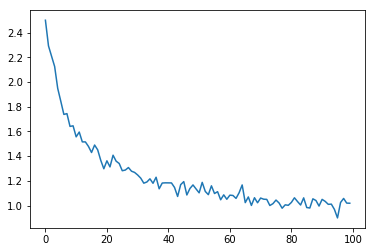

In [33]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(all_losses)
plt.show()

In [36]:
n_confusion = 10000
prediction=[]
actual=[]

for _ in range(n_confusion):
    
    i = random.randint(0, len(names_data) - 1)
    
    name = names_data.iloc[i][0]
    name_in_tensor = name_to_tensor(name)
    
    language = names_data.iloc[i][1]
    language_in_tensor = torch.tensor([list(languages).index(language)], dtype=torch.long)
    
    hidden = rnn.initHidden()
    
    for j in range(name_in_tensor.size()[0]):
        output, hidden = rnn(name_in_tensor[j], hidden)
        
    pred = output_to_language(output)
    
    prediction.append(pred)
    actual.append(language)

In [37]:
!pip install pandas_ml

In [38]:
from pandas_ml import ConfusionMatrix
import numpy as np

In [39]:
confusion_matrix = ConfusionMatrix(actual, prediction)

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

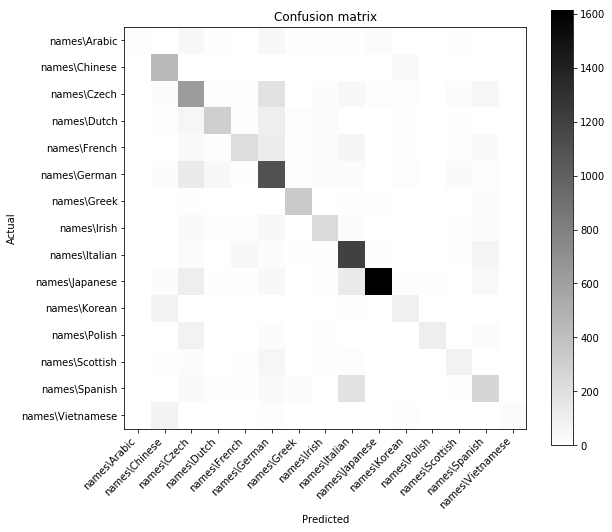

In [41]:
confusion_matrix.plot()

In [42]:
correct = 0
for i, data in enumerate(actual):
    if data == prediction[i]:
        correct += 1

In [43]:
print('Accuracy of this language classifier is ', correct/n_confusion)

Accuracy of this language classifier is  0.6652
